In [1]:
from tensorflow.keras.datasets import imdb

2022-11-30 13:22:26.721501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
# word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index() 
# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decodes the review. Note that the indices are offset by 3 
# because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” 
# and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #Sets specific indices of results[i] to 1s
    return results

In [5]:
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [6]:
# You should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup
you’ll ever encounter. A type of network that performs well on such a problem is
a simple stack of fully connected (Dense) layers with relu activations: Dense(16,
activation='relu').

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-30 13:22:53.380337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile the model

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Configure the optimizer

In [9]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

### Custom losses and metrics

In [10]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

### Set aside a validation set

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Train the model

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
    epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5719 - acc: 0.7545 - val_loss: 0.4552 - val_acc: 0.8634
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3713 - acc: 0.8861 - val_loss: 0.3411 - val_acc: 0.8799
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2740 - acc: 0.9114 - val_loss: 0.2995 - val_acc: 0.8865
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2168 - acc: 0.9313 - val_loss: 0.2859 - val_acc: 0.8867
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1797 - acc: 0.9437 - val_loss: 0.3350 - val_acc: 0.8659
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1568 - acc: 0.9521 - val_loss: 0.2848 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1315 - acc: 0.9621 - val_loss: 0.2984 - val_acc: 0.8798
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1161 - a

### Model History

Note that the call to model.fit() returns a History object. This object has a member
history, which is a dictionary containing data about everything that happened
during training.

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plotting the training and validation loss

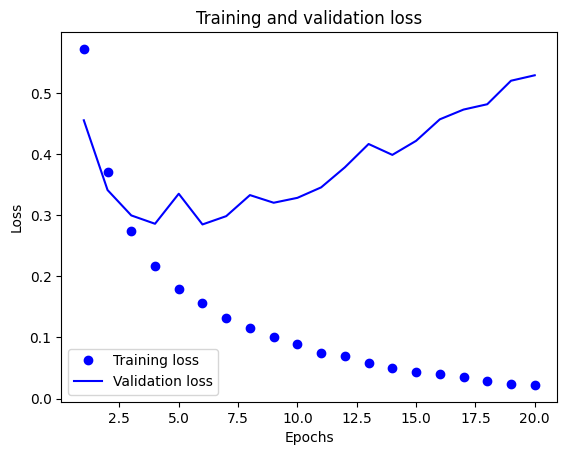

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

# “bo” is for “blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# “b” is for “solid blue line.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

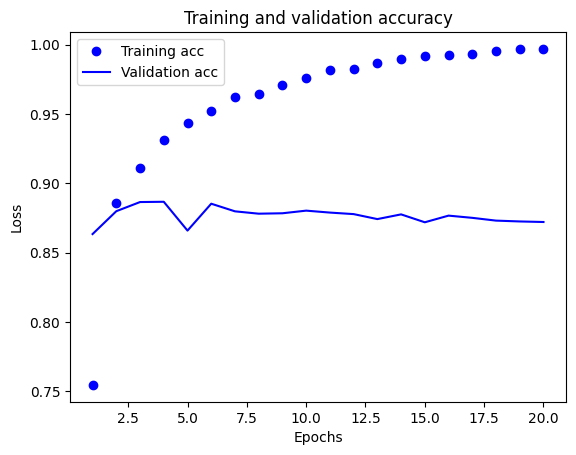

In [16]:
plt.clf() # Clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

#The final results are as follows:
print(results) # This fairly naive approach achieves an accuracy of 88%.


Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4859 - accuracy: 0.8086
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2880 - accuracy: 0.9015
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2237 - accuracy: 0.9177
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2845 - accuracy: 0.8858
[0.284546822309494, 0.8857600092887878]


### Using a trained network to generate predictions on new data

In [28]:
model.predict(x_test)

array([[0.16375789],
       [0.9985558 ],
       [0.31587934],
       ...,
       [0.08151257],
       [0.04194662],
       [0.3636062 ]], dtype=float32)